In [ ]:
import numpy as np

# 설정
num_items = 6800  # 전체 아이템 수
num_samples = 200  # 샘플링할 아이템 수
num_users = 10  # 예시로 10명의 유저

# 각 유저별로 multinomial distribution을 사용하여 중복 없이 샘플링
def sample_items_for_user(num_items, num_samples, probabilities=None):
    """
    Multinomial distribution을 사용하여 중복 없이 아이템 샘플링
    
    Args:
        num_items: 전체 아이템 수
        num_samples: 샘플링할 아이템 수
        probabilities: 각 아이템의 확률 분포 (None이면 균등 분포)
    
    Returns:
        샘플링된 아이템 인덱스 배열
    """
    if probabilities is None:
        # 균등 분포
        probabilities = np.ones(num_items) / num_items
    else:
        # 확률 정규화
        probabilities = probabilities / probabilities.sum()
    
    # 중복 없이 샘플링
    sampled_items = np.random.choice(
        num_items, 
        size=num_samples, 
        replace=False,  # 중복 없이
        p=probabilities
    )
    
    return sampled_items

# 예시 1: 균등 분포로 샘플링
print("예시 1: 균등 분포로 샘플링")
user_samples_uniform = []
for user_id in range(num_users):
    samples = sample_items_for_user(num_items, num_samples)
    user_samples_uniform.append(samples)
    print(f"User {user_id}: 샘플링된 아이템 개수 = {len(samples)}, "
          f"중복 확인 = {len(samples) == len(set(samples))}, "
          f"처음 10개 = {samples[:10]}")

print("\n" + "="*70 + "\n")

# 예시 2: 커스텀 multinomial distribution으로 샘플링
print("예시 2: 커스텀 분포로 샘플링 (앞쪽 아이템에 더 높은 확률)")
# 앞쪽 아이템에 더 높은 확률을 주는 분포 생성
custom_probs = np.exp(-np.arange(num_items) / 1000)  # 지수 감소
custom_probs = custom_probs / custom_probs.sum()

user_samples_custom = []
for user_id in range(num_users):
    samples = sample_items_for_user(num_items, num_samples, custom_probs)
    user_samples_custom.append(samples)
    print(f"User {user_id}: 샘플링된 아이템 개수 = {len(samples)}, "
          f"중복 확인 = {len(samples) == len(set(samples))}, "
          f"처음 10개 = {sorted(samples)[:10]}")

print("\n" + "="*70 + "\n")

# 예시 3: 각 유저마다 다른 분포 사용
print("예시 3: 각 유저마다 다른 선호도 분포")
user_samples_varied = []
for user_id in range(num_users):
    # 각 유저마다 다른 중심을 가진 정규분포 기반 확률
    center = (user_id * 680) % num_items
    user_probs = np.exp(-((np.arange(num_items) - center) ** 2) / (2 * 500**2))
    user_probs = user_probs / user_probs.sum()
    
    samples = sample_items_for_user(num_items, num_samples, user_probs)
    user_samples_varied.append(samples)
    print(f"User {user_id} (중심={center}): 평균={samples.mean():.1f}, "
          f"중앙값={np.median(samples):.1f}, "
          f"중복 확인 = {len(samples) == len(set(samples))}")

예시 1: 균등 분포로 샘플링
User 0: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [ 882 6289 2415 5497 2834 5972 1257 6502 1530 6040]
User 1: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [6252 3314 3209 2443 2562 5522 1947 2240 5188 3826]
User 2: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [1919 1872 4018 3142  871 2123  650 3755 3685 6672]
User 3: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [3918 3259 6685 2478  180 6690 2688 1643 5661 6438]
User 4: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [1633 5774 1647 5609  368 3571 3455  917 2294 3542]
User 5: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [ 374 5416 5721 5195  799 4198 4443 5881 2217 6530]
User 6: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [5746 5204 1360  300  164 4169 2289  942 1000 4487]
User 7: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [4341 5287 3114 2407 3691 4507 3819 3603 1719  599]
User 8: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [1131 2326 5486 2446 2836 2469 5141 4628 2207 5729]
User 9: 샘플링된 아이템 개수 = 200, 중복 확인 = True, 처음 10개 = [3010 1573  164

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

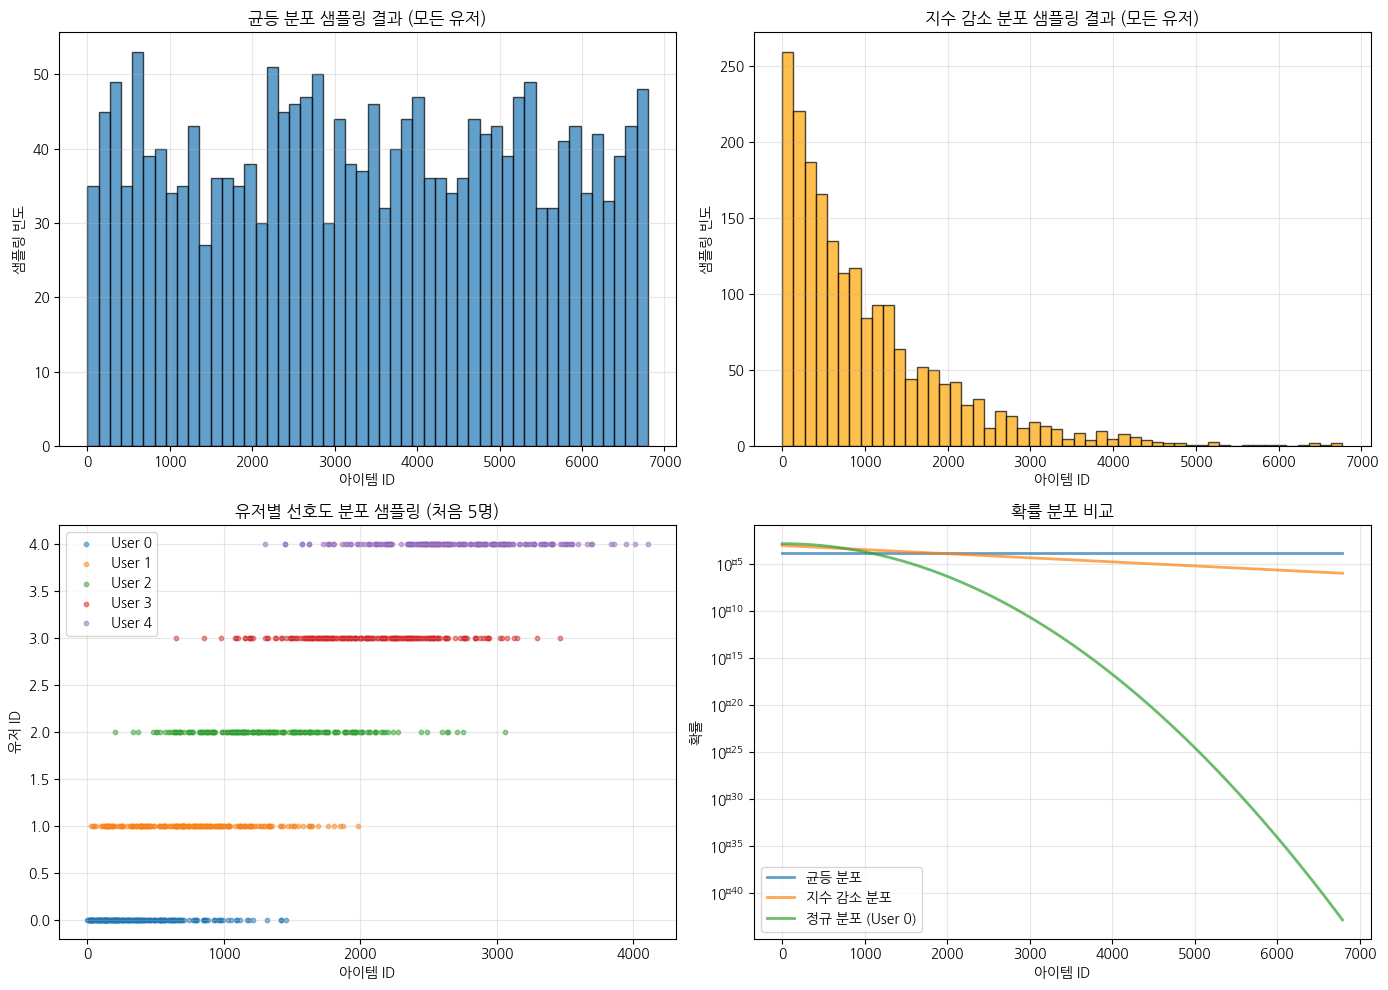

In [3]:
import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")
plt.rc("axes", unicode_minus=False)

# 샘플링 결과 시각화
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. 균등 분포 샘플링 결과
ax = axes[0, 0]
all_samples = np.concatenate(user_samples_uniform)
ax.hist(all_samples, bins=50, edgecolor='black', alpha=0.7)
ax.set_title('균등 분포 샘플링 결과 (모든 유저)', fontsize=12)
ax.set_xlabel('아이템 ID')
ax.set_ylabel('샘플링 빈도')
ax.grid(True, alpha=0.3)

# 2. 커스텀 분포 샘플링 결과
ax = axes[0, 1]
all_samples_custom = np.concatenate(user_samples_custom)
ax.hist(all_samples_custom, bins=50, edgecolor='black', alpha=0.7, color='orange')
ax.set_title('지수 감소 분포 샘플링 결과 (모든 유저)', fontsize=12)
ax.set_xlabel('아이템 ID')
ax.set_ylabel('샘플링 빈도')
ax.grid(True, alpha=0.3)

# 3. 유저별 다른 분포 샘플링 결과
ax = axes[1, 0]
for i, samples in enumerate(user_samples_varied[:5]):  # 처음 5명만
    ax.scatter(samples, [i]*len(samples), alpha=0.5, s=10, label=f'User {i}')
ax.set_title('유저별 선호도 분포 샘플링 (처음 5명)', fontsize=12)
ax.set_xlabel('아이템 ID')
ax.set_ylabel('유저 ID')
ax.legend()
ax.grid(True, alpha=0.3)

# 4. 확률 분포 비교
ax = axes[1, 1]
x = np.arange(num_items)
# 균등 분포
uniform_prob = np.ones(num_items) / num_items
ax.plot(x[::10], uniform_prob[::10], label='균등 분포', alpha=0.7, linewidth=2)
# 지수 감소 분포
ax.plot(x[::10], custom_probs[::10], label='지수 감소 분포', alpha=0.7, linewidth=2)
# 유저 0의 정규분포
center = 0
user0_probs = np.exp(-((np.arange(num_items) - center) ** 2) / (2 * 500**2))
user0_probs = user0_probs / user0_probs.sum()
ax.plot(x[::10], user0_probs[::10], label='정규 분포 (User 0)', alpha=0.7, linewidth=2)
ax.set_title('확률 분포 비교', fontsize=12)
ax.set_xlabel('아이템 ID')
ax.set_ylabel('확률')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_yscale('log')

plt.tight_layout()
plt.show()

In [3]:
import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")
plt.rc("axes", unicode_minus=False)

In [1]:
import matplotlib.font_manager

[f.fname for f in matplotlib.font_manager.fontManager.ttflist]

['/data/ephemeral/home/juik/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf',
 '/data/ephemeral/home/juik/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf',
 '/data/ephemeral/home/juik/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf',
 '/data/ephemeral/home/juik/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf',
 '/data/ephemeral/home/juik/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf',
 '/data/ephemeral/home/juik/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf',
 '/data/ephemeral/home/juik/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.ttf',
 '/data/ephemeral/home/juik/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf',
 '/data/ephemeral/home/juik/.venv/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf